# Módulo 08 - Estruturas de Dados

## GeoSeries vs GeoDataframe

A `GeoSeries` é um vetor onde cada entrada no vetor é um conjunto de formas correspondentes a uma observação, por exemplo, um único polígono.

Já o `GeoDataframe` é uma estrutura de dados que contém um arquivo `GeoSeries`.

In [ ]:
!pip install click==8.1.3
!pip install geopandas
import geopandas as gpd

In [ ]:
from shapely.geometry import Polygon, LineString, Point

s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1,1), (0,1)]),
        Polygon([(10, 0), (10,5), (0,0)]),
        Polygon([(0, 0), (2,2), (2,0)]),
        LineString([(0, 0), (1,1), (0,1)]),
        Point(0,1)
    ]

)
s

In [ ]:
type(s)

## Diferença entre Dataframe e GeoDataframe



In [36]:
import geopandas as gpd
import os
from osgeo import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
in_vector = '/content/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp'
gdf = gpd.read_file(in_vector)

In [38]:
# Definir o caminho da pasta
pasta = r'/content/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp'
#pasta = "/content/DPA_A_100K_2022_GCS_SIR_SEI.shp"

# Juntar o nome do arquivo com a pasta
# pasta_arquivo = os.path.join(pasta, 'BR_Municipios_2021.shp')
print(pasta)
#print(pasta_arquivo)

/content/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp


In [39]:
dados = gpd.read_file(pasta)

In [40]:
type(dados)

geopandas.geodataframe.GeoDataFrame

In [41]:
dados.head(10)

,geometry
0,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."
5,"POLYGON ((-39.54455 -17.25407, -39.54392 -17.2..."
6,"POLYGON ((-39.29208 -16.88804, -39.29128 -16.8..."
7,"POLYGON ((-40.47861 -16.87550, -40.47853 -16.8..."
8,"POLYGON ((-39.69681 -16.72893, -39.69620 -16.7..."
9,"POLYGON ((-40.28126 -16.67303, -40.27991 -16.6..."


In [16]:
dados.tail()

,geometry
412,"POLYGON ((-38.85007 -8.78115, -38.84197 -8.781..."
413,"POLYGON ((-39.04231 -8.71451, -39.03443 -8.715..."
414,"POLYGON ((-41.37434 -8.70315, -41.36931 -8.704..."
415,"POLYGON ((-39.35347 -8.54508, -39.34996 -8.548..."
416,"POLYGON ((-39.38255 -8.52824, -39.37641 -8.529..."


In [42]:
# Verificar o nome das colunas
dados.columns.values

array(['geometry'], dtype=object)

In [31]:
dados = dados[['codmun','nommun','codregmeso', 'nomregmeso', 'codti', 'nomti', 'st_area_sh', 'st_length_', 'geometry']]
dados.head()

KeyError: ignored

In [18]:
dados.shape

(417, 1)

In [19]:
# Verificando o número de linhas e colunas
print(f'O número de linhas é: {dados.shape[0]}')
print(f'O número de colunas é: {dados.shape[1]}')

O número de linhas é: 417
O número de colunas é: 1


<AxesSubplot:>

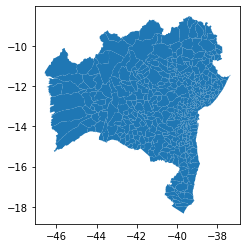

In [20]:
dados.plot()

In [21]:
for indice, linha in dados[0:10].iterrows():
    area_polig = linha['geometry'].area
    print(f"O polígono de índice {indice} possui uma área de {area_polig:.2f} m²")
    

O polígono de índice 0 possui uma área de 0.11 m²
O polígono de índice 1 possui uma área de 0.15 m²
O polígono de índice 2 possui uma área de 0.07 m²
O polígono de índice 3 possui uma área de 0.20 m²
O polígono de índice 4 possui uma área de 0.05 m²
O polígono de índice 5 possui uma área de 0.13 m²
O polígono de índice 6 possui uma área de 0.14 m²
O polígono de índice 7 possui uma área de 0.12 m²
O polígono de índice 8 possui uma área de 0.20 m²
O polígono de índice 9 possui uma área de 0.12 m²


In [22]:
# Criar uma coluna área em km2
dados['Area'] = dados.area
dados.head()

,geometry,Area
0,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [23]:
# Apagando a coluna area por estar fora do padrão de nome de atributo
dados = dados.drop(columns=['Area'])
dados.head()

,geometry
0,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7..."
1,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7..."
2,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6..."
3,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4..."
4,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3..."


In [24]:
# Criar uma coluna área em km2
dados['area_km2'] = dados.area
dados.head()

,geometry,area_km2
0,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292
1,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912
2,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687
3,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838
4,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214


In [25]:
# Transformando o atributo st_area_sh em km2
dados['st_area_sh'] = dados['area_km2'] * 100
dados.head()

,geometry,area_km2,st_area_sh
0,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",0.112292,11.229212
1,"POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...",0.148912,14.891190
2,"POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...",0.065687,6.568659
3,"POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...",0.202838,20.283775
4,"POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...",0.053214,5.321426


In [26]:
# área máxima de st_area_sh
round(dados['st_area_sh'].max(), 2)

129.36

In [27]:
# área mínima de st_area_sh
dados['st_area_sh'].min()

0.2749316655600316

In [28]:
# área média de st_area_sh
dados['st_area_sh'].mean()

11.276888146242879

In [29]:
# Soma de todas as áreas de st_area_sh 
dados['st_area_sh'].sum() / dados['st_area_sh'].shape[0]

11.276888146242879

# Selecionando um Município e Salvando

In [30]:
select = dados.loc[dados['nommun'] == 'Senhor do Bonfim']

KeyError: ignored

In [ ]:
select.head()

In [ ]:
select.plot()

In [ ]:
pasta_saida = r"C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios"

# Criar pasta
os.mkdir(pasta_saida)

In [ ]:
arquivo_saida = os.path.join(pasta_saida, "BA_Senhor_do_Bonfim.shp")
print(arquivo_saida)

In [ ]:
# Salvando o arquivo
select.to_file(arquivo_saida)

# Agrupando GeoDataframe

In [ ]:
dados.head()

In [ ]:
# DPA da Bahia com informações de TI e agrupar os municípios por TI
dados['nomti'].unique()

In [ ]:
agrupar = dados.groupby('nomti')
agrupar

In [ ]:
agrupar.groups.keys()

In [ ]:
for chave, grupo in agrupar:
    print(f'Nome do Território Identidade: {chave}')
    print(f'Número de Municípios: {len(grupo)}')

In [ ]:
arquivo_saida = r"C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios"

resultado = os.path.join(arquivo_saida, "Resultados")

if not os.path.exists(resultado):
    print("Criando a pasta.")
    os.makedirs(resultado)
else:
    print("A pasta ja existe")

In [ ]:
agrupar.head()

In [ ]:
for chave, grupo in agrupar:
    nome_saida = f'{chave}.shp'
    print('Salvando o arquivo', os.path.basename(nome_saida))
    caminho_saida = os.path.join(resultado, nome_saida)
    grupo.to_file(caminho_saida)

# Trabalhando com Coordenadas

Para saber o código do EPSG da região de interesse existem diversos sites, mas eu costumo utilizar esse aqui: 
https://spatialreference.org/

In [ ]:
import geopandas as gpd

In [ ]:
arquivo = r"C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\Resultados\Bacia do Jacuípe.shp"

In [ ]:
dados_bacia_jacuipe = gpd.read_file(arquivo)
dados_bacia_jacuipe.head()

In [ ]:
# Verificar o sistema de coordenadas
dados_bacia_jacuipe.crs

In [ ]:
# Criar uma cópia do arquivo
dados_bacia_jacuipe_epsg_4674 = dados_bacia_jacuipe.copy()

# Reprojetar para a coordenada da região
dados_bacia_jacuipe = dados_bacia_jacuipe.to_crs(epsg=31982)

In [ ]:
dados_bacia_jacuipe.crs

In [ ]:
dados_bacia_jacuipe.head()

In [ ]:
dados_bacia_jacuipe['area_km2'] = dados_bacia_jacuipe.area
dados_bacia_jacuipe.head()

In [ ]:
dados_bacia_jacuipe_epsg_4674.head()

In [ ]:
import matplotlib.pyplot as plt

# Fazendo um plot do lado do outro

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

dados_bacia_jacuipe_epsg_4674.plot(ax=ax1, facecolor='gray')
dados_bacia_jacuipe.plot(ax=ax2, facecolor='gray')

# Definir a proporção como 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)


In [ ]:
# Criando o path do arquivo de saída EPSG 31982 e EPSG 4674
arquivo_saida_epsg31982 = r'C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\Resultados\Bacia_Jacuipe_epsg31982.shp'
arquivo_saida_epsg4674 = r'C:\Shapefiles\dados_curso_basico\Reg_BA\Municipios\Resultados\Bacia_Jacuipe_epsg4674.shp'
arquivo_saida_epsg31982

In [ ]:
arquivo_saida_epsg4674

In [ ]:
# Salvar o arquivo
dados_bacia_jacuipe.to_file(arquivo_saida_epsg31982)
dados_bacia_jacuipe.to_file(arquivo_saida_epsg4674)

# Fim do módulo 8